## Práctica Calificada de Inteligencia Artificial

Nombre y apellidos: Sánchez Sauñe Cristhian Wiki

#### Indicaciones:

* Entregar en este cuaderno todas tus respuestas teoricas. No se aceptan otro tipo de formato.
* En esta tarea hay  programas de codificación. Debes presentar pruebas de tus soluciones como el correcto funcionamiento con distintos ejemplos.
* Debes responder todas los ítems de las preguntas.
* Todo acto de COPIA implica la nota de $0A$. Evita copiar de páginas web!.

* Todas las lecturas dadas serán tomadas en cuenta en esta evaluación.


### Lista de ejercicios

1.Traduzca la siguiente expresión lógica de descripción a lógica de primer orden y explica el resultado:

```
And(Man, AtLeast (3, Son), AtMost(2, Daughter ),
    All(Son, And(Unemployed , Married , All(Spouse, Doctor ))),
    All(Daughter , And(Professor , Fills(Department , Physics, Math)))).
```


In [ ]:
# Tu solución

2. Ejecuta el descenso de gradiente para minimizar la función:

$$g(w) = \frac{1}{50}(w^4 + w^2 +10w)$$

con un punto inicial $w_0 = 2$ y $1000$ iteraciones. Haga tres corridas separadas usando cada uno de los valores del tamaño de paso $\lambda = 1$, $\lambda = 10^{-1}$ y $\lambda = 10^{-2}$. Calcula la derivada de esta función a mano e implementa esto (así como la función ) en Python usando NumPy.

Traza la gráfica del historial de la función de costo resultante de cada ejecución en una sola figura para comparar su desempeño. ¿Qué valor del tamaño de paso funciona mejor para esta función y punto inicial en particular?.

In [115]:
# Tu solucion
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import decimal
decimal.getcontext().prec = 100


# Debemos diseñar la regla de actualización y las derivadas necesarias

g = lambda X: (X**4 + X**2 + 10*X)/50.0
d_g = lambda X: (4*(X**3) + 2*X + 10)/50.0   # igualando a 0, tenemos que el mínimo vale -0.16996928431321037, para w=-1.2348
cost = lambda X: 0.5*((-0.16996928431321037 - g(X))**2)
d_cost = lambda X: -(-0.16996928431321037 - g(X))*d_g(X)

class MinFunction:
    def __init__(self, lambda_param, g_function=g, d_g_function=d_g, cost_function=cost, d_cost=d_cost, w_0=2.0):
        self.lambda_param = lambda_param
        self.g_function = g_function
        self.d_g_function = d_g_function
        self.cost_function = cost_function
        self.d_cost = d_cost
        self.w = w_0
        
    def fit(self):
        cost_hist = {}
        for i in range(1, 1001): 
            #print(self.w)
            self.w -= self.lambda_param*self.d_cost(self.w)
            np.round(self.w, 4)
            if i%50 == 0:
                print("G({}) : {} ".format(round(self.w, 4), round(self.g_function(self.w), 4)), end="\t")
                print("G'({}) : {} ".format(round(self.w, 4), round(self.d_g_function(self.w), 4)), end="\t")
                print("Cost({}) : {} ".format(round(self.w, 4), round(self.cost_function(self.g_function(self.w)), 4)), end="\n")
                cost_hist[i] = self.cost_function(self.g_function(self.w))
        return cost_hist
    
    def predict(self):
        return self.g_function(self.w)


In [116]:
# Entrenamos para diferentes valores de lambda
lambda_values = [1, 0.1, 0.01]
hist = []
for l in lambda_values:
    print("Mostrando resultados para lambda {} \n".format(l))
    min_f = MinFunction(lambda_param=l)
    hist.append(min_f.fit())
    print("\n")

Mostrando resultados para lambda 1 

G(-0.6072) : -0.1114 	G'(-0.6072) : 0.1578 	Cost(-0.6072) : 0.0109 
G(-0.8611) : -0.1464 	G'(-0.8611) : 0.1145 	Cost(-0.8611) : 0.01 
G(-0.9546) : -0.1561 	G'(-0.9546) : 0.0922 	Cost(-0.9546) : 0.0097 
G(-1.0041) : -0.1603 	G'(-1.0041) : 0.0789 	Cost(-1.0041) : 0.0096 
G(-1.0353) : -0.1626 	G'(-1.0353) : 0.0698 	Cost(-1.0353) : 0.0095 
G(-1.0571) : -0.1641 	G'(-1.0571) : 0.0632 	Cost(-1.0571) : 0.0095 
G(-1.0734) : -0.1651 	G'(-1.0734) : 0.0581 	Cost(-1.0734) : 0.0095 
G(-1.0861) : -0.1658 	G'(-1.0861) : 0.0541 	Cost(-1.0861) : 0.0094 
G(-1.0963) : -0.1663 	G'(-1.0963) : 0.0507 	Cost(-1.0963) : 0.0094 
G(-1.1047) : -0.1667 	G'(-1.1047) : 0.0479 	Cost(-1.1047) : 0.0094 
G(-1.1119) : -0.1671 	G'(-1.1119) : 0.0456 	Cost(-1.1119) : 0.0094 
G(-1.118) : -0.1674 	G'(-1.118) : 0.0435 	Cost(-1.118) : 0.0094 
G(-1.1233) : -0.1676 	G'(-1.1233) : 0.0417 	Cost(-1.1233) : 0.0094 
G(-1.128) : -0.1678 	G'(-1.128) : 0.0401 	Cost(-1.128) : 0.0094 
G(-1.1322) : -0.167

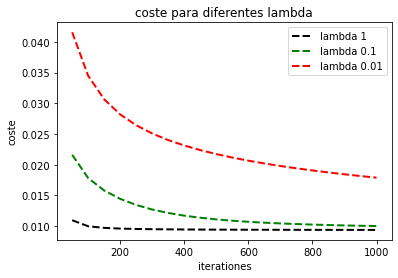

In [117]:
# ahora procedemos a graficar
plt.plot(hist[0].keys(), hist[0].values(), color='k', linestyle='dashed', linewidth = 2, markersize=10, label = "lambda 1")
plt.plot(hist[1].keys(), hist[1].values(), color='g', linestyle='dashed', linewidth = 2, markersize=10,label = "lambda 0.1")
plt.plot(hist[2].keys(), hist[2].values(), color='r', linestyle='dashed', linewidth = 2, markersize=10,label = "lambda 0.01")

plt.xlabel('iterationes')
plt.ylabel('coste') 

plt.title('coste para diferentes lambda') 
plt.legend() 
plt.show()

3. En clase hemos tratada la regresión ridge ($l_2$-regularizada) y $l_1$-regularizada (lasso). Existe una versión híbrida llamada *elástic net* que usa términos de regularización $l_1$ y $l_2$:

$$J_{EL} = \Vert \mathbf{y} -\mathbf{Xw} \Vert^2 + \lambda_1 \Vert \mathbf{w} \Vert_1 + \lambda_2 \Vert \mathbf{w} \Vert^2$$

    Si definimos:

$$J_{2} = \Vert \mathbf{\tilde{y}} -\mathbf{\tilde{X}w} \Vert^2  + c\lambda_1 \Vert \mathbf{w} \Vert_1$$

donde $c = (1 + \lambda_2)^{-1/2}$ y 

$$
\mathbf{\tilde{X}} = \begin{pmatrix}
\mathbf{X}\\
\sqrt{\lambda_2}\mathbf{I}_d
\end{pmatrix}, \qquad \mathbf{\tilde{y}} =  \begin{pmatrix}
\mathbf{y}\\
\mathbf{0}_{d \times 1}
\end{pmatrix}
$$

Muestra que: 

$$arg \min_{\mathbf{w}}J_{EL}(\textbf{w}) = c(arg \min_{\mathbf{w}}J_2(\mathbf{w})))$$.

Esto implica que un problema de *elastic net* puede resolverse como un problema de *lasso*, utilizando datos modificados.

##### NOTA: EN CASO NO SE VISUALICE LA IMAGEN, ESTA SE ENCUENTRA EN LA CARPETA DE LA CALIFICADA, 'demo.jpg'

<p align="center">
    <br>
    <img src="./demo.jpg"/>
    <br>
</p>

4. Explica los siguientes resultados indicando verdadero o falso. Se puntuara si se contesta todas los ítems.

 * Para la regresión logística, con parámetros optimizados mediante un método de gradiente estocástico, establecer los parámetros en $0$ es una inicialización aceptable.

 * El uso de la validación cruzada para seleccionar hiperparámetros garantizará que nuestro modelo no se sobreajuste.

 * Los algoritmos Bagging asignan pesos $w_1 \dots, w_n$ a un conjunto de $N$ estudiantes débiles. Vuelven a ponderar a los alumnos y los convierten en fuertes. Los algoritmos Boosting extraen $N$ distribuciones de muestra (generalmente con reemplazo) de un conjunto de datos original para que los alumnos se entrenen.

 * Un árbol de decisión binario de profundidad infinita siempre puede alcanzar el $100\%$ de exactitud en el entrenamiento, siempre que ningún punto esté mal etiquetado en el conjunto de entrenamiento.

a) Verdadero, solo para el caso de una regresión logistica, incluso si los pesos se ponen en 0, lo logra una convergencia mediante SGD. Sin embargo esto no es cierto en redes neuronales, pues no permite realizar el proceso de backpropagation.

b) Falso, si bien muchas veces es usado como técnica para combatir el sobreajuste, no funcionará bien con datos externos si los datos que tiene no son representativos de los datos que intentará predecir.

c) Falso, las definiciones estan intercambiadas. Boosting trata de añadir nuevos modelos que funcionan bien donde los modelos anteriores carecen.

d) Verdad, esto es cierto para una profundidad infinita, pues cada división binaria interna dentro del árbol por cada nivel se ajusta perfectamente a todos los datos de entrenamiento, sin embargo no se logra una generalización para los datos de prueba, debido a que se esta sobreajustando.

5. Se podría perforar un pozo de petróleo en la granja del profesor Neapolitan en Texas. Con base en lo que ha sucedido en granjas similares, juzgamos que la probabilidad de que haya petróleo presente es de $0.5$, la probabilidad de que solo esté presente gas natural es de $0.2$ y la probabilidad de que ninguno de los dos esté presente es de $0.3$. Si hay petróleo presente, una prueba geológica dará un resultado positivo con probabilidad de $0.9$,  si solo hay gas natural, dará un resultado positivo con probabilidad $0.3$  y si ninguno está presente, la prueba será positiva con probabilidad $0.1$. Supongamos que la prueba resulta positiva. Utilice el teorema de Bayes para calcular la probabilidad de que haya petróleo.

Pet: hay petroleo 1 , no hay petroleo 0
Gas: hay gas 1, no hay gas 0
Res: positivo 1, negativo 0

Datos:
    P(Pet=1) = 0.5  
    P(Gas=1) = 0.2
    P(Pet=0, Gas=0) = P(nada) = 0.3
    P(Res=1 | Pet=1) = 0.9
    P(Res=1 | Gas=1) = 0.3
    P(Res=1 | Pet=0, Gas=0) = P(Res=1 | nada) = 0.1
    
Calcular P(Pet=1 | Res =1)

Usando el teorema de Bayes:
    𝑃(Pet=1|Res=1) = 𝑃(Res=1|Pet=1) * 𝑃(Pet=1) / 𝑃(Res=1) 
    
De los datos tenemos:
    𝑃(Res=1|Pet=1) = 0.9
    𝑃(Pet=1) = 0.5
    
    𝑃(Pet=1|Res=1) = 0.9 * 0.5 / 𝑃(Res=1)   .... (*)

Ahora hallaremos 𝑃(Res=1):
    𝑃(Res=1) = 𝑃(Res=1|Pet=1)*P(Pet=1) + 𝑃(Res=1|gas=1)*P(gas) + P(Res=1 | nada) 𝑃(nada)  = 0.9*0.5 + 0.3*0.2 + 0.1*0.3 =   ...(**)
    

Finalmente en (*):
    𝑃(Pet=1|Res=1) = 0.9 * 0.5 / 
    

    

6 . Se te proporciona un modelo de Bayes, que se muestra a continuación, con la etiqueta $Y$ y las características $X_1$ y $X_2$. Las probabilidades condicionales del modelo están parametrizadas por $p_1$, $p_2$ y $q$.

![](NaiveBayes.png)

Ten en cuenta que algunos de los parámetros son compartidos (por ejemplo, $P(X_1 = 0|Y = 0)=P(X_1 = 1|Y = 1) = p_1$).


Dado un nuevo punto de dato con $X_1 = 1$ y $X_2 = 1$, ¿cuál es la probabilidad de que este punto tenga la etiqueta $Y = 1$? Expresa tu respuesta en términos de los parámetros $p_1$, $p_2$ y $q$ (es posible que no los necesite todos). Es decir debes calcular : $P(Y= 1| X_1= 1,X_2= 1)$.

<p align="center">
    <br>
    <img src="https://economipedia.com/wp-content/uploads/Teorema-de-Bayes-1.png"/>
    <br>
</p>

𝑃(𝑌=1|𝑋1=1,𝑋2=1) = 𝑃(𝑌=1|𝑋1=1)𝑃(𝑌=1|𝑋2=1)  .... (*)

-> usando el teorema de Bayes

a)

𝑃(𝑌=1|𝑋1=1) = 𝑃(𝑋1=1|𝑌=1)* 𝑃(𝑌=1) / 𝑃(𝑋1=1) = p1 * q / 𝑃(𝑋1=1)
-> 𝑃(𝑋1=1) = ((1-p1)*(1-q) + p1*q)

finalmente ->  𝑃(𝑌=1|𝑋1=1) = p1 * q / ((1-p1)*(1-q) + p1*q)

b)

𝑃(𝑌=1|𝑋2=1) = 𝑃(𝑋2=1|𝑌=1)* 𝑃(𝑌=1) / 𝑃(𝑋2=1) = p2 * q / 𝑃(𝑋2=1)
-> 𝑃(𝑋2=1) = ((1-p2)*(1-q) + p2*q)
finalmente ->  𝑃(𝑌=1|𝑋2=1) = p2 * q / ((1-p2)*(1-q) + p2*q)

uniendo a y b en (*) tenemos:
   𝑃(𝑌=1|𝑋1=1,𝑋2=1) = 𝑃(𝑌=1|𝑋1=1)𝑃(𝑌=1|𝑋2=1) = p1 * q * p2 * q  = p1*p2*(q^2) / (((1-p1)*(1-q) + p1*q) * ((1-p2)*(1-q) + p2*q))

7. Explica los siguientes resultados indicando verdadero o falso. Se puntuara si se contesta todas los ítems.

  * La acción realizada por un agente racional siempre será una función determinista de las percepciones actuales del agente.

 * Una ruta de solución óptima para un problema de búsqueda con costos positivos nunca tendrá estados repetidos.

 * Si dos heurísticas de búsqueda $h_1(s)$ y $h_2(s)$ tienen el mismo valor promedio, la heurística $h_3(s) = \max (h_1(s), h_2(s))$ podría dar una mejor eficiencia $A^*$ que $h_1$ o $h_2$.

 * Para cualquier conjunto de atributos, y cualquier conjunto de entrenamiento generado por una función determinista para esos atributos, existe un árbol de decisiones que es consistente con ese conjunto de entrenamiento.


a) Verdadero, un agente racional debe "hacer lo correcto", en función de lo que pueda percibir actualmente y las acciones que puede realizar. La acción correcta es la uno que hará que el agente tenga más éxito, dicha acción se basa en reglas determinísticas determinada por una función determística..

b) Verdadero, en cualquier ruta de solución con estados que se repiten n veces, eliminar un ciclo produce una ruta cuya solución siempre tendra un costo mucho menor. 
c) Verdadero, si tienen el mismo valor promedio entonces existe un g(s) = 1/2 h1(s) + 1/2 h2(s). Sea h^∗(s) la verdadera distancia desde s. Sabemos que h1(s)≤h^∗(s) y h2(s)≤h ∗ (s), entonces g(s) = 1/2 h1(s) + 1/2 h2(s) ≤ 1/2 h^∗(s) + 1/2 h^∗(s ) = h^∗(s)
d) Verdadero, debido a que los atributos de ese conjunto de entrenamiento se puede reducir en condiciones binarias que pueden ser modelado por un árbol de decisión de determinado nivel o altura H. Para un árbol de profundidad infinita, siempre se convergerá a un modelamiento de dichos atributos.

8 . Usaremos el conjunto de datos [*Breast Cancer Wisconsin (Diagnostic)*](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/version/2), llamado `data.csv`

 * ¿Cuántas observaciones (filas) hay en el conjunto de datos?
 * Asigna a una lista de nombre `feature_columns` todas las columnas del conjunto de datos menos el `id` de cada observación y la clase `diagnosis` que es la que buscaremos predecir.
 * Crea una nueva columna `'target'` que tenga un valor numérico de `+1` en las muestras positivas (cuando el diagnóstico sea maligno) y `-1` en las muestra negativas (diagnóstico benigno).
 * Empleando `sklearn.model_selection.train_test_split` separa el conjunto de datos en un 90% para entrenamiento y validación (`X_trainval`, `y_trainval`), y 10% para pruebas (`X_test`, `y_test`).

   Luego separa (`X_trainval`, `y_trainval`) en un 80% para entrenamiento (`X_train`, `y_train`) y 20% para validación (`X_val`, `y_val`).
   
* Empleando `sklearn.preprocessing.StandardScaler` se ha normalizado en un arreglo `X_trainval_scaled` el conjunto de entrenamiento y validación. Usa `sklearn.decomposition.PCA` para calcular los vectores de carga **`pca_loadings`** y el puntaje **`pca_scores`** de cada observación en el espacio de los componentes principales.

* Crea una instancia de la clase `sklearn.linear_model.LogisticRegression` y ajusta un modelo con el conjunto de **entrenamiento**

* Usa el modelo para predecir la probabilidad de que cada una de las observaciones de conjunto de **validación** corresponda a la clase positiva (diagnóstico maligno).

In [43]:
import pandas as pd

datos = pd.read_csv("data.csv")
datos.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
datos.info()

# vemos en la parte inferior que tenemos 569 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
# modificamos los targets

datos.diagnosis.replace('B', -1,inplace=True)
datos.diagnosis.replace('M', 1,inplace=True)

# eliminamos la columna de id
datos = datos.drop(["id", "Unnamed: 32"], axis=1)

# renombramos la columna diagnosis por target
datos.rename(columns={'diagnosis':'target'}, 
                 inplace=True)

datos.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
# cambiamos el orden de las columnas
cols = datos.columns.tolist()

cols[0], cols[30] = cols[30], cols[0]

datos = datos[cols]

datos.head()

,fractal_dimension_worst,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,target
0,0.11890,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,1
1,0.08902,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,1
2,0.08758,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,1
3,0.17300,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,1
4,0.07678,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,1


In [47]:
# ahora creamos la lista feature_columns
feature_columns = datos.columns.tolist()[0:-1]
print(feature_columns)

['fractal_dimension_worst', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [48]:
# división de los datos
from sklearn.model_selection import train_test_split

X = datos.drop("target", axis=1).values
y = datos.target.values

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.2, random_state=0)

print("X_train shape: {}  y_train shape{}".format(X_train.shape, y_train.shape))
print("\nX_val shape: {}\t y_val shape{}".format(X_val.shape, y_val.shape))
print("\nX_test shape: {}\t y_test shape{}".format(X_test.shape, y_test.shape))

X_train shape: (409, 30)  y_train shape(409,)

X_val shape: (103, 30)	 y_val shape(103,)

X_test shape: (57, 30)	 y_test shape(57,)


In [49]:
# importamos e instanciamos el modelo de regresión
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# para el entrenamiento usaremos la mitad de las componentes totales de las características
pca = PCA(n_components=15)

logReg = LogisticRegression(max_iter=1000)

model = make_pipeline(StandardScaler(), pca, logReg)

In [50]:
model.fit(X_train, y_train)  

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=15)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

##### Nota: 
No estamos usando el conjunto de validación porque no usamos búsqueda de hiperparámetros (con grid search)

In [51]:
# mostramos los puntajes alcanzados en el conjunto de entrenamiento, validación y prueba
print("Puntaje en el conjunto de entrenamiento: %f" % model.score(X_train, y_train))
print("Puntaje en el conjunto de validación: %f" % model.score(X_val, y_val))
print("Puntaje en el conjunto de prueba: %f" % model.score(X_test, y_test))

# observamos que el modelo NO sufre de sobreajuste

Puntaje en el conjunto de entrenamiento: 0.987775
Puntaje en el conjunto de validación: 0.990291
Puntaje en el conjunto de prueba: 1.000000


In [52]:
# hacemos una predicción

print("input: ", X_test[1:2])
print("target: ", y_test[1:2])
print("predicción: ", model.predict(X_test[1:2]))

input:  [[6.788e-02 1.321e+01 2.525e+01 8.410e+01 5.379e+02 8.791e-02 5.205e-02
  2.772e-02 2.068e-02 1.619e-01 5.584e-02 2.084e-01 1.350e+00 1.314e+00
  1.758e+01 5.768e-03 8.082e-03 1.510e-02 6.451e-03 1.347e-02 1.828e-03
  1.435e+01 3.423e+01 9.129e+01 6.329e+02 1.289e-01 1.063e-01 1.390e-01
  6.005e-02 2.444e-01]]
target:  [-1]
predicción:  [-1]


In [53]:
# ahora nuestro modelo esta listo para predecir alguna de las siguientes clases
model.classes_ 

array([-1,  1], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

y_true = y_val
y_pred = model.predict(X_val)
target_names = ["benigno", "maligno"]  # 1 para maligno y -1 para benigno
print(classification_report(y_true, y_pred, target_names=target_names))

# mirando el siguiente cuadro concluimos, usando la definición de precision (!= accuracy), de que una observación corresponda
# a la clase positiva (maligno) viene dada por 1.00 TP/TP+FP

# nota: ESTOS RESULTADOS SON EN BASE AL CONJUNTO DE VALIDACIÓN

              precision    recall  f1-score   support

     benigno       0.99      1.00      0.99        67
     maligno       1.00      0.97      0.99        36

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



Puntos extras: Calcula las predicciones en el conjunto de validación con un umbral de probabilidad `> 0.7`, indicando a continuación la matriz de confusión, la exactitud, precisión, exhaustividad de las predicciones. Se provee la función `print_binary_confusion_matrix` para mostrar la matriz de confusión. 

```
from sklearn import metrics

def print_binary_confusion_matrix(matrix):
    TN = matrix[0,0]
    FN = matrix[1,0]
    FP = matrix[0,1]
    TP = matrix[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
    print ('+-------+-----+--------+--------+')

```

In [55]:
from sklearn.metrics import confusion_matrix

def print_binary_confusion_matrix(matrix):
    TN = matrix[0,0]
    FN = matrix[1,0]
    FP = matrix[0,1]
    TP = matrix[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
    print ('+-------+-----+--------+--------+')
    

y_true = y_val
y_pred = model.predict(X_val)

matrix = confusion_matrix(y_true, y_pred)

In [56]:
print_binary_confusion_matrix(matrix)

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |     35 |      1 |
| real  +-----+--------+--------+
|       |  -  |      0 |     67 |
+-------+-----+--------+--------+
